Logistic Regressions ( https://www.tinyurl.com/ietaworkshop)

```
# This is formatted as code
```



In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train = pd.read_csv('train.csv')


In [0]:
# Lets Check the Status of Train.csv 
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
# Exploratory Data Analysis ( EDA ) 

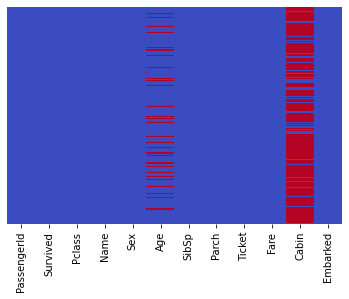

In [0]:
# Missing Data 
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm') # coolwarm, viridis no. of color mapping options available with heatamp

To Resolve the Missing Values Approach -In this case Age & Cabin two Columns are containing missing values , The portion of Age Missing is likely small but for reasonable replacement with some form of impuation is required ( Just Recall our sunsports data set from SILSO) 

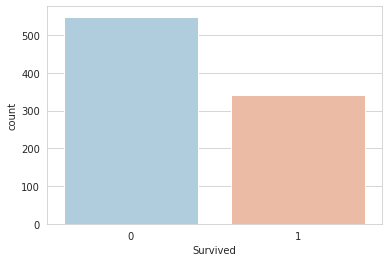

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

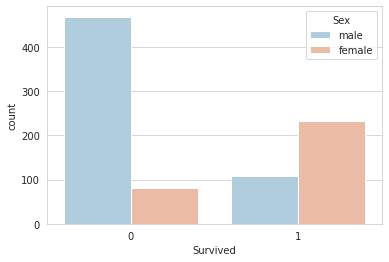

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

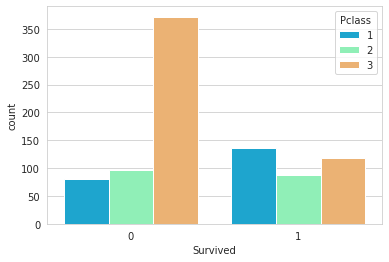

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

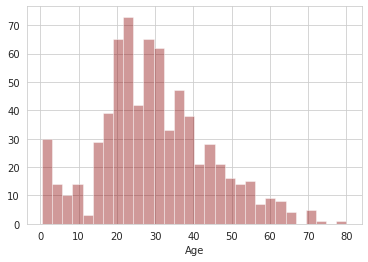

In [0]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

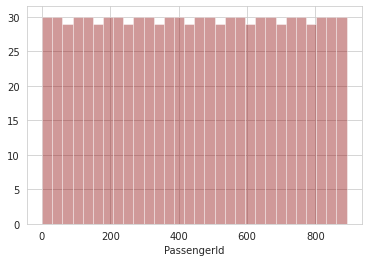

In [0]:
sns.distplot(train['PassengerId'].dropna(),kde=False,color='darkred',bins=30)

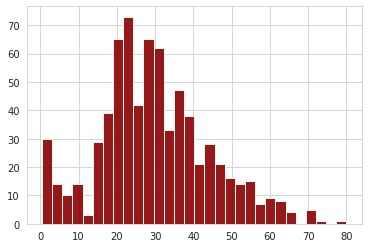

In [0]:
train['Age'].hist(bins=30,color='darkred',alpha=0.9)

In [0]:
# Similar to Matplotlib / Seaborn  / Bokeh  - Cufflinks for plot 
!pip install cufflinks 

In [0]:
# How to Import cufflinks 
import cufflinks as cf # conda install cufflinks | # pip install cufflinks 
cf.go_offline()

In [0]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

In [0]:
# Data Cleaning - We want to fill is missing age data instead of just dropping the missing age data rows , One way to resolve the problem 
# by filling in the mean age of all of the passengers ( imputation )

In [0]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37

    elif Pclass == 2:
      return 30

    else:
      return 25
  else:
      return Age      
         
        

In [0]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)


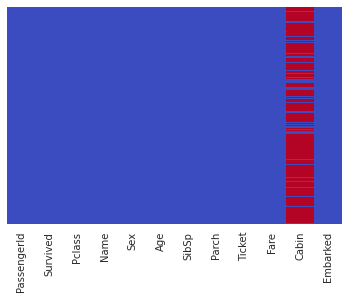

In [0]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [0]:
# Drop Colums of Embarked that is NaN
train.drop("Cabin",axis=1,inplace=True)
train.dropna(inplace=True)

KeyError: ignored

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [0]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [0]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

KeyError: ignored

In [0]:
train = pd.concat([train,sex,embark],axis=1)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [0]:
# Now Implement Logistic Regressions 


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test= train_test_split(train.drop('Survived',axis=1),
                                                train['Survived'],test_size=0.28,
                                                random_state=101)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(X_test)

In [0]:
# Evalution Model